In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functions as f

In [3]:
#loading dataset df_final_demo
df_final_demo = f.load_data("./df_final_demo.txt")
df_final_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
df_final_demo['gendr'] = df_final_demo['gendr'].replace('X', 'U')

In [5]:
#loading dataset df_final_experiment_clients
df_final_experiment_clients = f.load_data("./df_final_experiment_clients.txt")
df_final_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [6]:
#loading dataset df_final_web_data_pt_1
df_final_web_data_pt_1 = f.load_data("./df_final_web_data_pt_1.txt")
df_final_web_data_pt_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [7]:
#loading dataset df_final_web_data_pt_2
df_final_web_data_pt_2 = f.load_data("./df_final_web_data_pt_2.txt")
df_final_web_data_pt_2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [8]:
#loading dataset merging the two dataset
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index = True)
df_final_web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [9]:
df_final_demo.dropna(inplace=True)

In [10]:
df_experiment = df_final_experiment_clients.dropna(subset=['Variation'])

# These 3 datasets to be used after final cleaning for further analysis
df_final_demo,
df_experiment,
df_final_web_data

In [11]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70594 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70594 non-null  int64  
 1   clnt_tenure_yr    70594 non-null  float64
 2   clnt_tenure_mnth  70594 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70594 non-null  object 
 5   num_accts         70594 non-null  float64
 6   bal               70594 non-null  float64
 7   calls_6_mnth      70594 non-null  float64
 8   logons_6_mnth     70594 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.4+ MB


In [23]:
df_final_web_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


<Axes: xlabel='clnt_age', ylabel='Count'>

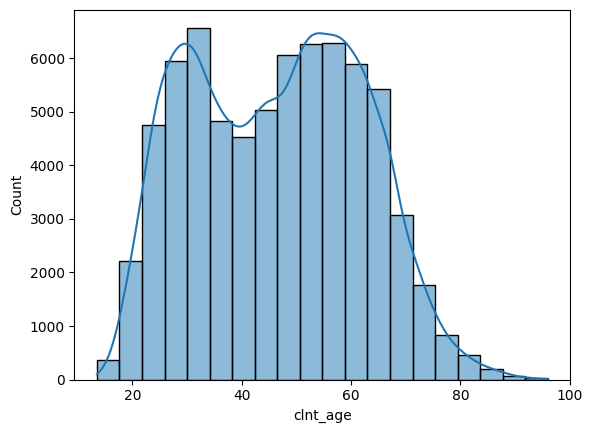

In [12]:
sns.histplot(df_final_demo['clnt_age'], bins = 20, kde =True)

<Axes: xlabel='clnt_age'>

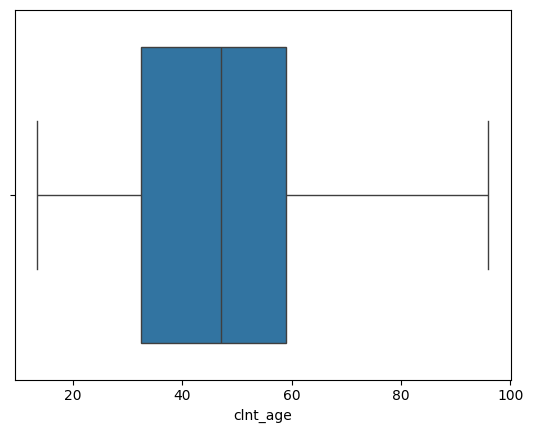

In [13]:
sns.boxplot(x = df_final_demo['clnt_age'])

<Axes: xlabel='gendr', ylabel='count'>

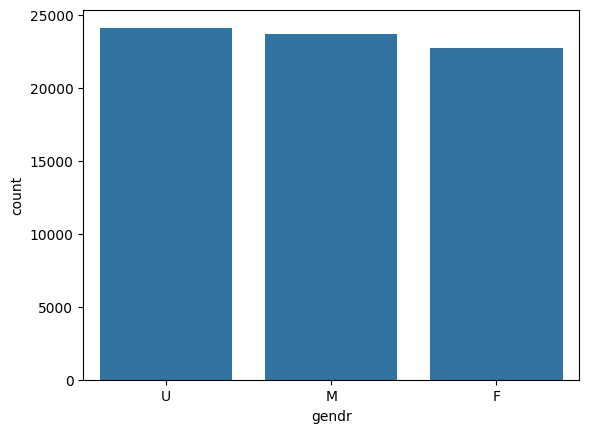

In [14]:
sns.countplot(data=df_final_demo, x='gendr')

In [15]:
gender_percent = df_final_demo['gendr'].value_counts(normalize=True) * 100
print(gender_percent)

gendr
U    34.174292
M    33.606255
F    32.219452
Name: proportion, dtype: float64


<Axes: xlabel='num_accts', ylabel='clnt_tenure_yr'>

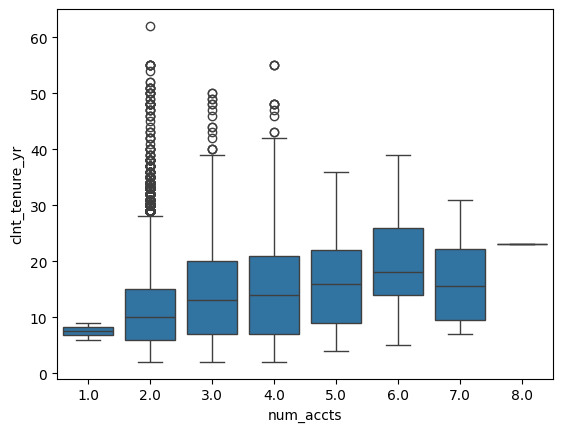

In [16]:
sns.boxplot(data=df_final_demo, x='num_accts', y='clnt_tenure_yr')

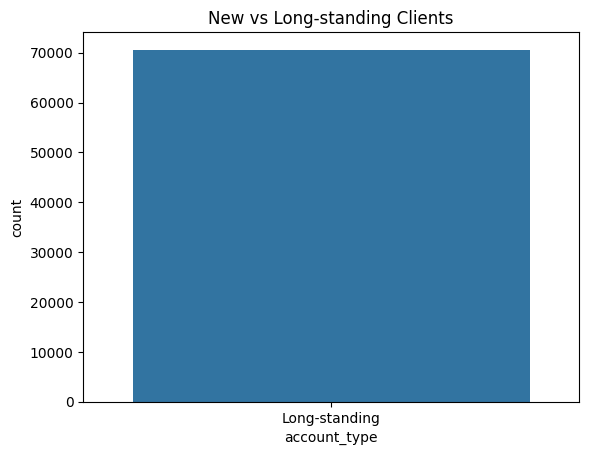

In [37]:
df_final_demo['account_type'] = df_final_demo['clnt_tenure_yr'].apply(lambda x: 'New' if x < 2 else 'Long-standing')
sns.countplot(data=df_final_demo, x='account_type')
plt.title('New vs Long-standing Clients')
plt.show()

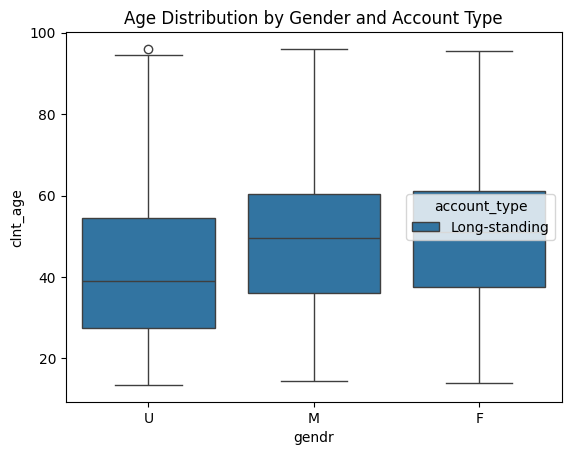

In [38]:
sns.boxplot(data=df_final_demo, x='gendr', y='clnt_age', hue='account_type')
plt.title('Age Distribution by Gender and Account Type')
plt.show()

In [20]:
print(df_final_demo['logons_6_mnth'].describe())

count    70594.000000
mean         5.566720
std          2.353296
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: logons_6_mnth, dtype: float64


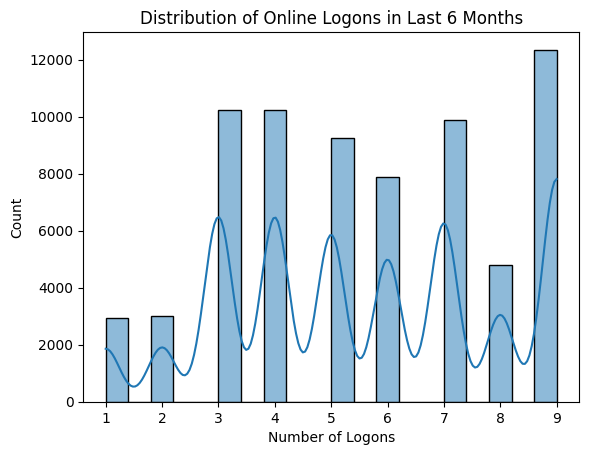

In [39]:
#Explore Online Activity
sns.histplot(df_final_demo['logons_6_mnth'], bins=20, kde=True)
plt.title('Distribution of Online Logons in Last 6 Months')
plt.xlabel('Number of Logons')
plt.ylabel('Count')
plt.show()

In [ ]:
#Count unique visits per client
visits_per_client = df_final_web_data.groupby('client_id')['visit_id'].nunique().reset_index()
visits_per_client.rename(columns={'visit_id':'num_visits'}, inplace=True)

In [26]:
visits_per_client 

,client_id,num_visits
0,169,1
1,336,1
2,546,1
3,555,1
4,647,1
...,...,...
120152,9999729,3
120153,9999768,1
120154,9999832,1
120155,9999839,1


In [28]:
steps_per_client = df_final_web_data.groupby(['client_id','process_step']).size().reset_index(name='step_count')
steps_per_client

,client_id,process_step,step_count
0,169,confirm,1
1,169,start,1
2,169,step_1,1
3,169,step_2,1
4,169,step_3,1
...,...,...,...
493117,9999875,confirm,1
493118,9999875,start,1
493119,9999875,step_1,2
493120,9999875,step_2,1


In [30]:
df_merged = df_final_demo.merge(visits_per_client, on='client_id', how='left')
df_merged = df_merged.merge(steps_per_client.groupby('client_id')['step_count'].sum().reset_index(), on='client_id', how='left')
df_merged['step_count'] = df_merged['step_count'].fillna(0)
df_merged['num_visits'] = df_merged['num_visits'].fillna(0)

In [31]:
df_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,account_type,num_visits,step_count
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Long-standing,2,11
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Long-standing,1,6
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Long-standing,2,5
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Long-standing,1,1
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Long-standing,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Long-standing,3,11
70590,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Long-standing,1,8
70591,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Long-standing,1,5
70592,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Long-standing,5,9


In [33]:
#Active Online Clients
median_visits = df_merged['num_visits'].median()
df_merged['activity_level'] = df_merged['num_visits'].apply(lambda x: 'Active' if x >= median_visits else 'Inactive')
df_merged['activity_level']

0        Active
1        Active
2        Active
3        Active
4        Active
          ...  
70589    Active
70590    Active
70591    Active
70592    Active
70593    Active
Name: activity_level, Length: 70594, dtype: object

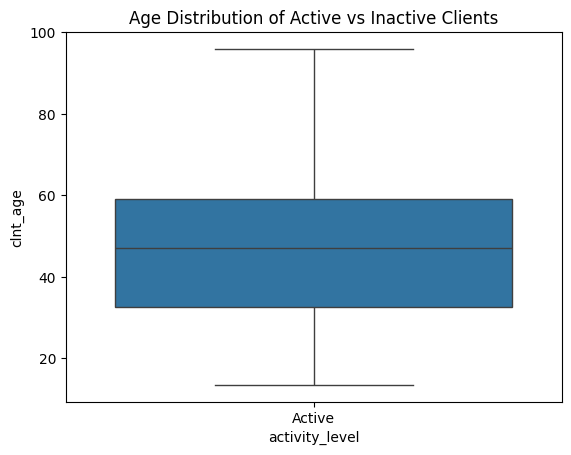

In [40]:
#Analyze Active Clients by Demographics
# Age
sns.boxplot(data=df_merged, x='activity_level', y='clnt_age')
plt.title('Age Distribution of Active vs Inactive Clients')
plt.show()

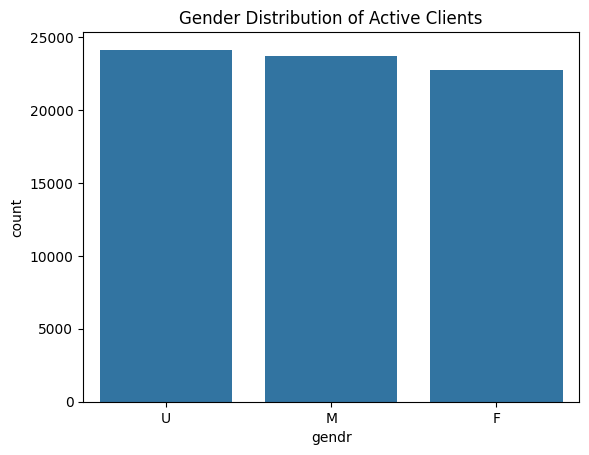

In [41]:

# Gender
sns.countplot(data=df_merged[df_merged['activity_level']=='Active'], x='gendr')
plt.title('Gender Distribution of Active Clients')
plt.show()

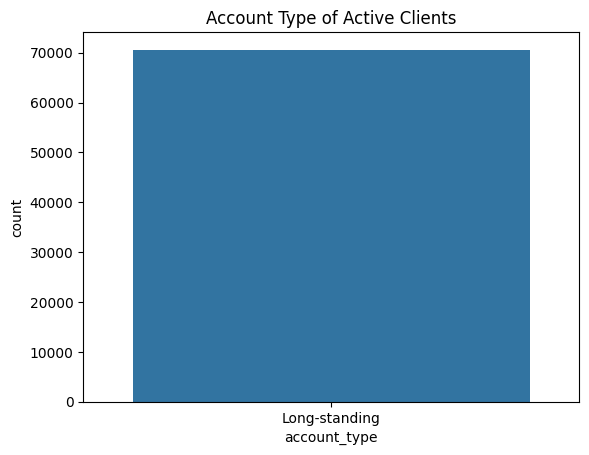

In [42]:
# Account Type
sns.countplot(data=df_merged[df_merged['activity_level']=='Active'], x='account_type')
plt.title('Account Type of Active Clients')
plt.show()

In [ ]:
#How often do clients log in or visit the platform?
#Are there “super active” clients driving most interactions?
# Visits per client
visits_per_client = df_final_web_data.groupby('client_id')['visit_id'].nunique().reset_index()
visits_per_client.rename(columns={'visit_id':'num_visits'}, inplace=True)
visits_per_client

,client_id,num_visits
0,169,1
1,336,1
2,546,1
3,555,1
4,647,1
...,...,...
120152,9999729,3
120153,9999768,1
120154,9999832,1
120155,9999839,1


In [47]:
# Merge with demographics
df_behavior = df_final_demo.merge(visits_per_client, on='client_id', how='left')
df_behavior['num_visits'] = df_behavior['num_visits'].fillna(0)
df_behavior

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,account_type,num_visits
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Long-standing,2
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Long-standing,1
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Long-standing,2
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Long-standing,1
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Long-standing,1
...,...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Long-standing,3
70590,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Long-standing,1
70591,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Long-standing,1
70592,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Long-standing,5


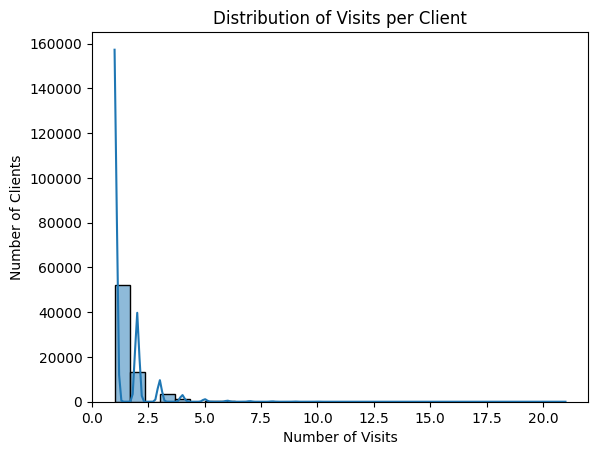

In [48]:
# Visualize
sns.histplot(df_behavior['num_visits'], bins=30, kde=True)
plt.title('Distribution of Visits per Client')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Clients')
plt.show()

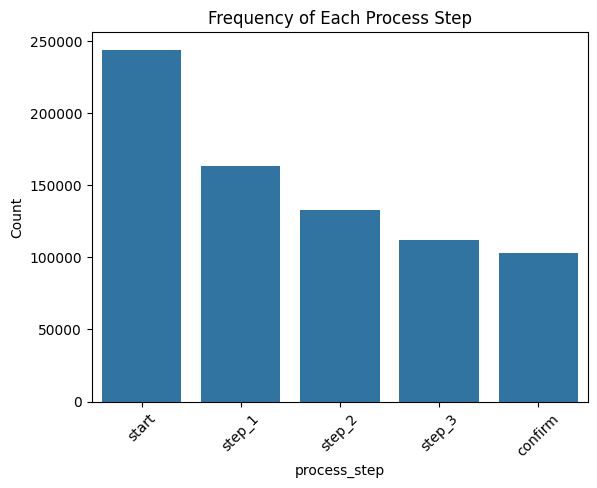

In [49]:
#Which steps in the online process are most commonly used?
#Are some steps causing drop-offs or repeated attempts?

# Count of each process step
process_counts = df_final_web_data['process_step'].value_counts()

# Visualization
sns.barplot(x=process_counts.index, y=process_counts.values)
plt.xticks(rotation=45)
plt.title('Frequency of Each Process Step')
plt.ylabel('Count')
plt.show()

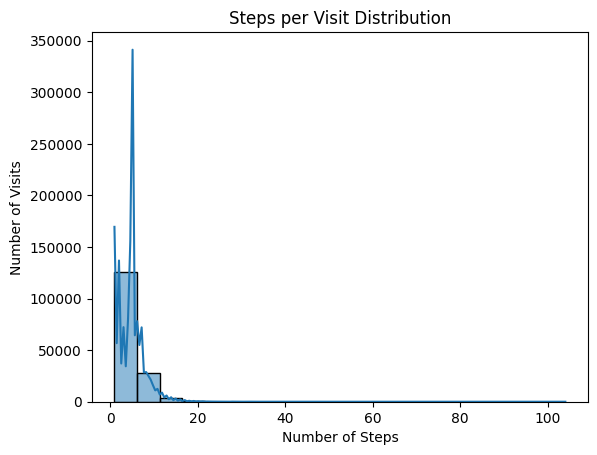

In [51]:
#How many steps do clients perform per visit?
#Do some clients complete the process faster or slower?

steps_per_visit = df_final_web_data.groupby('visit_id')['process_step'].count().reset_index()
sns.histplot(steps_per_visit['process_step'], bins=20, kde=True)
plt.title('Steps per Visit Distribution')
plt.xlabel('Number of Steps')
plt.ylabel('Number of Visits')
plt.show()


In [53]:
# Convert date_time to datetime
df_final_web_data['date_time'] = pd.to_datetime(df_final_web_data['date_time'], errors='coerce')

# Check if conversion worked
print(df_final_web_data['date_time'].dtype)
print(df_final_web_data['date_time'].head())

datetime64[ns]
0   2017-04-17 15:27:07
1   2017-04-17 15:26:51
2   2017-04-17 15:19:22
3   2017-04-17 15:19:13
4   2017-04-17 15:18:04
Name: date_time, dtype: datetime64[ns]


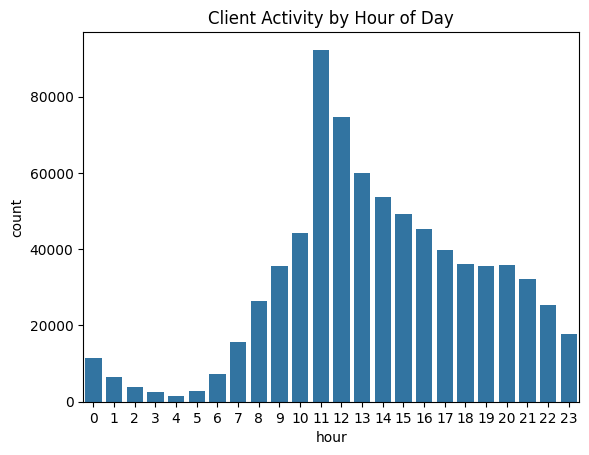

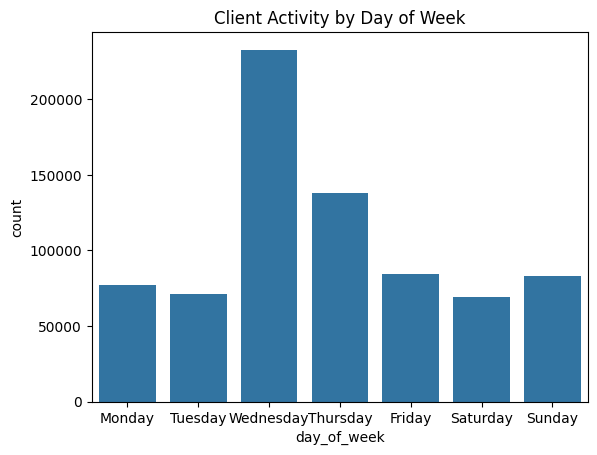

In [54]:
#Are there peak times/days when clients use the platform?
# Does behavior differ by day of the week or time of day?

df_final_web_data['hour'] = df_final_web_data['date_time'].dt.hour
df_final_web_data['day_of_week'] = df_final_web_data['date_time'].dt.day_name()

# Visits by hour
sns.countplot(data=df_final_web_data, x='hour')
plt.title('Client Activity by Hour of Day')
plt.show()

# Visits by day
sns.countplot(data=df_final_web_data, x='day_of_week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Client Activity by Day of Week')
plt.show()